In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../../../toprank_chemical_jan22_cv3_jan22_hitsnorm.csv")
#ranked.descriptor = ranked.descriptor.str.replace("CP", "CS")
#ranked

In [6]:
#data = ranked #pd.merge(ranked, auc, on=["assay_id", "descriptor"])
data["folds_improvement"] = data.top_rank_hit_rate / data.hit_rate
data

,Unnamed: 0,assay_id,auc,descriptor,auc_50,auc_70,auc_90,ASSAY_TYPE,AP,pr_auc,readouts,hits,hit_rate,top_rank_hit_rate,folds_improvement
0,0,100_277,0.666667,CS+MO,True,False,False,NaN,0.722222,0.677778,7,3,0.428571,0.666667,1.555556
1,1,100_277,0.750000,CS,True,True,False,NaN,0.833333,0.816667,7,3,0.428571,0.666667,1.555556
2,2,100_277,0.750000,GE,True,True,False,NaN,0.638889,0.513889,7,3,0.428571,0.666667,1.555556
3,3,100_278,0.833333,CS+MO,True,True,False,NaN,0.916667,0.908333,7,4,0.571429,0.500000,0.875000
4,4,100_278,0.583333,CS,True,False,False,NaN,0.733333,0.691667,7,4,0.571429,0.500000,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,805,9_17,NaN,CS,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0.000000,NaN,NaN
806,806,9_17,NaN,GE,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0.000000,NaN,NaN
807,807,9_18,0.500000,CS+MO,False,False,False,NaN,0.500000,0.250000,3,1,0.333333,0.000000,0.000000
808,808,9_18,0.000000,CS,False,False,False,NaN,0.333333,0.166667,3,1,0.333333,0.000000,0.000000


In [8]:
data[data.auc > 0.9].groupby("descriptor")[["top_rank_hit_rate", "auc", "hit_rate", "folds_improvement"]].mean()


,top_rank_hit_rate,auc,hit_rate,folds_improvement
descriptor,,,,
CS,0.699075,0.964857,0.248728,50.895011
CS+MO,0.420455,0.974935,0.203075,33.441274
GE,0.263889,0.991334,0.258780,38.053819


In [9]:
data[data.auc > 0.9].groupby("descriptor")[["folds_improvement"]].max()


,folds_improvement
descriptor,
CS,586.0
CS+MO,586.0
GE,586.0


In [10]:
data[data.auc > 0.9].groupby("descriptor").count()

,Unnamed: 0,assay_id,auc,auc_50,auc_70,auc_90,ASSAY_TYPE,AP,pr_auc,readouts,hits,hit_rate,top_rank_hit_rate,folds_improvement
descriptor,,,,,,,,,,,,,,
CS,28,28,28,28,28,28,12,28,28,28,28,28,28,28
CS+MO,33,33,33,33,33,33,13,33,33,33,33,33,33,33
GE,24,24,24,24,24,24,6,24,24,24,24,24,24,24


In [11]:
data[data.auc > 0.9].groupby("descriptor").mean()


,Unnamed: 0,auc,AP,pr_auc,readouts,hits,hit_rate,top_rank_hit_rate,folds_improvement
descriptor,,,,,,,,,
CS,438.571429,0.964857,0.699361,0.684949,487.785714,7.357143,0.248728,0.699075,50.895011
CS+MO,469.363636,0.974935,0.741528,0.729694,342.272727,5.121212,0.203075,0.420455,33.441274
GE,360.875000,0.991334,0.877750,0.871641,194.583333,1.916667,0.258780,0.263889,38.053819


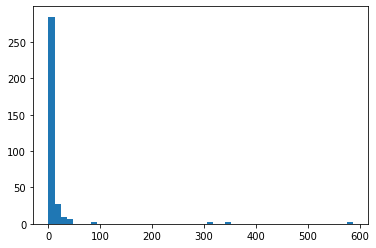

In [12]:
h = plt.hist(data[(data.folds_improvement > 0)].folds_improvement, bins=50)


In [13]:
data[data.auc_90 == True][:10]

,Unnamed: 0,assay_id,auc,descriptor,auc_50,auc_70,auc_90,ASSAY_TYPE,AP,pr_auc,readouts,hits,hit_rate,top_rank_hit_rate,folds_improvement
5,5,100_278,1.0,GE,True,True,True,NaN,1.0,1.0,7,4,0.571429,0.5,0.875
17,17,104_297,1.0,GE,True,True,True,NaN,1.0,1.0,4,1,0.250000,0.0,0.000
18,18,104_299,1.0,CS+MO,True,True,True,NaN,1.0,1.0,4,2,0.500000,1.0,2.000
19,19,104_299,1.0,CS,True,True,True,NaN,1.0,1.0,4,2,0.500000,1.0,2.000
20,20,104_299,1.0,GE,True,True,True,NaN,1.0,1.0,4,2,0.500000,1.0,2.000
27,27,104_323,1.0,CS+MO,True,True,True,NaN,1.0,1.0,4,2,0.500000,0.5,1.000
29,29,104_323,1.0,GE,True,True,True,NaN,1.0,1.0,4,2,0.500000,0.5,1.000
32,32,104_325,1.0,GE,True,True,True,NaN,1.0,1.0,4,1,0.250000,0.0,0.000
66,66,105_375,1.0,CS+MO,True,True,True,NaN,1.0,1.0,7,1,0.142857,1.0,7.000
67,67,105_375,1.0,CS,True,True,True,NaN,1.0,1.0,7,1,0.142857,1.0,7.000


183


c:\users\nikit\miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,assay_id,auc,descriptor,auc_50,auc_70,auc_90,ASSAY_TYPE,AP,pr_auc,readouts,hits,hit_rate,top_rank_hit_rate,folds_improvement
5,5,100_278,1.000000,GE,True,True,True,NaN,1.000000,1.000000,7,4,0.571429,0.500000,0.875000
19,19,104_299,1.000000,CS,True,True,True,NaN,1.000000,1.000000,4,2,0.500000,1.000000,2.000000
20,20,104_299,1.000000,GE,True,True,True,NaN,1.000000,1.000000,4,2,0.500000,1.000000,2.000000
29,29,104_323,1.000000,GE,True,True,True,NaN,1.000000,1.000000,4,2,0.500000,0.500000,1.000000
67,67,105_375,1.000000,CS,True,True,True,NaN,1.000000,1.000000,7,1,0.142857,1.000000,7.000000
127,127,114_408,1.000000,CS,True,True,True,NaN,1.000000,1.000000,3,1,0.333333,1.000000,3.000000
178,178,118_434,1.000000,CS,True,True,True,NaN,1.000000,1.000000,4,3,0.750000,1.000000,1.333333
184,184,11_22,1.000000,CS,True,True,True,NaN,1.000000,1.000000,4,1,0.250000,1.000000,4.000000
185,185,11_22,1.000000,GE,True,True,True,NaN,1.000000,1.000000,4,1,0.250000,1.000000,4.000000
187,187,12_23,1.000000,CS,True,True,True,NaN,1.000000,1.000000,7,3,0.428571,1.000000,2.333333


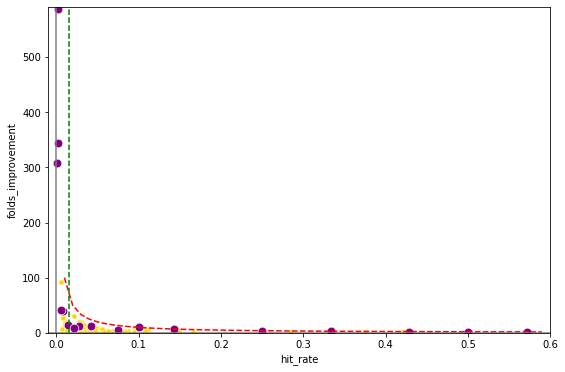

In [15]:
plt.figure(figsize=(9,6))

plt.plot(np.arange(0,0.6,0.01), 1/np.arange(0,0.6,0.01), color="red", linestyle="--")
plt.axvline(x=0.00, color="gray")
plt.axvline(x=0.015, color="green", linestyle="--")
plt.axhline(y=0.00, color="gray")
plt.ylim(-0.01,max(data.folds_improvement)+5)
plt.xlim(-0.01,0.6)

single_mod_data = data[data['descriptor'].isin(['CS','MO','GE'])]

D = single_mod_data[~(single_mod_data.auc_90 == True) & (single_mod_data.top_rank_hit_rate > 0) & (single_mod_data.hit_rate < 0.6)]
print(len(D))
sb.scatterplot(x=D.hit_rate, y=D.folds_improvement, color="gold", s=25)
D = single_mod_data[(single_mod_data.auc_90 == True) & (single_mod_data.top_rank_hit_rate > 0)]

sb.scatterplot(x=D.hit_rate, y=D.folds_improvement, color="purple", s=75)
D
#D = single_mod_data[(single_mod_data.auc_90 == True) & (single_mod_data.top_rank_hit_rate > 0) & (single_mod_data.hit_rate < 0.01)]
#print(np.mean(D.folds_improvement))
#D
#print(len(D))

In [ ]:
D

In [ ]:
data

In [ ]:
data[(data.hit_rate <= 1) & (data.auc > 0.9)].groupby("descriptor")[["top_rank_hit_rate", "auc", "hit_rate", "folds_improvement"]].mean()

In [ ]:
sb.scatterplot(x=D.hit_rate, y=D.auc)

In [ ]:
sb.distplot(data[(data.descriptor == "MO") & (data.folds_improvement > 0)].folds_improvement, bins=50)
sb.distplot(data[(data.descriptor == "GE") & (data.folds_improvement > 0)].folds_improvement, bins=50)
sb.distplot(data[(data.descriptor == "CS") & (data.folds_improvement > 0)].folds_improvement, bins=50)


In [ ]:
sb.scatterplot(data=data[data.folds_improvement>0], x="auc", y="folds_improvement")

In [ ]:
data[(data.auc > 0.9) & (data.folds_improvement > 40)]

In [ ]:
known_assay_types = data[~data.ASSAY_TYPE.isna()].groupby(["assay_id", "ASSAY_TYPE"]).count().reset_index()
known_assay_types = known_assay_types[["assay_id", "ASSAY_TYPE"]]

In [ ]:
other_data = pd.merge(data, known_assay_types, on=["assay_id"], how="left")

In [ ]:
other_data[(other_data.auc > 0.9) & (other_data.folds_improvement > 40)]

In [ ]:
data[data.descriptor == "MO"].groupby("ASSAY_TYPE").count()

In [ ]:
data.groupby("ASSAY_TYPE").count()